In [23]:
# made by Gibeom LEE, HI LAB
# 1M 샘플링의 csv파일을 100k 샘플링 파일로 변환합니다.

In [3]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

Peak number: 482


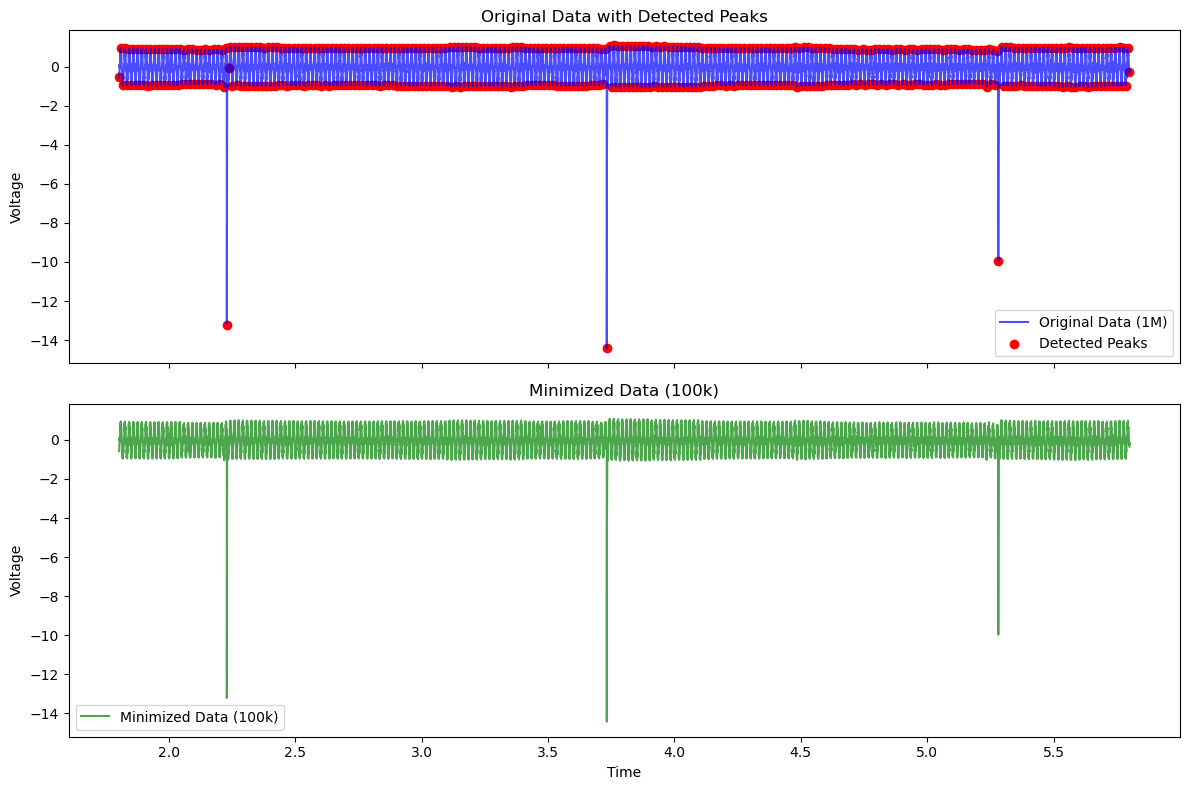

Original max: 1.0813
Original min: -14.4203

Filtered max: 1.0813
Filtered max: -14.4203


In [ ]:
# 파일이 있는 폴더 경로
file_path = r"c:\Users\limye\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. 실험자료\2. Collecting data\250503_코팅 유무\minimized_csv파일\Cut_A8_0.76 Hz.csv"

# 데이터 로드 (헤더 없음)
df = pd.read_csv(file_path, header=None, skiprows = 32)

# NaN 값 제거 및 컬럼 이름 지정
#df.iloc[:31, 1] = np.nan
df.columns = ["Time", "Voltage"]
df = df.astype(float)  # 데이터 타입 변환

# 피크 검출 (최대 피크와 최소 피크)
height = 0.0001 ################################### 최소 피크 전압 크기 조절 (노이즈 스케일 주의)######################### 
peaks_positive, _ = find_peaks(df["Voltage"], height, distance=100)  # 양의 피크
peaks_negative, _ = find_peaks(-df["Voltage"], height, distance=100)  # 음의 피크

# 모든 피크 인덱스 정렬
peaks = np.sort(np.concatenate((peaks_positive, peaks_negative)))

# 목표 샘플 개수
num_samples = 100000

# 피크 개수 확인
num_peaks = len(peaks)
print("Peak number:", num_peaks)

if num_peaks >= num_samples:
    # 피크 개수가 이미 충분하면 피크 중 일부만 선택
    selected_indices = np.sort(np.random.choice(peaks, num_samples, replace=False))
else:
    # 피크 유지, 나머지는 균등 샘플링
    num_non_peak_samples = num_samples - num_peaks
    non_peak_indices = np.setdiff1d(np.arange(len(df)), peaks)  # 피크 제외한 인덱스
    selected_non_peaks = np.linspace(0, len(non_peak_indices) - 1, num_non_peak_samples, dtype=int)
    selected_non_peaks = non_peak_indices[selected_non_peaks]

    # 최종 선택된 인덱스 (피크 + 균등 샘플링된 데이터)
    selected_indices = np.sort(np.concatenate((peaks, selected_non_peaks)))

# 필터링된 데이터
filtered_df = df.iloc[selected_indices]

# 그래프 설정
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1. 원본 데이터 그래프
axes[0].plot(df["Time"], df["Voltage"], label="Original Data (1M)", color='blue', alpha=0.7)
axes[0].scatter(df["Time"].iloc[peaks], df["Voltage"].iloc[peaks], color='red', marker='o', label="Detected Peaks")
axes[0].set_title("Original Data with Detected Peaks")
axes[0].set_ylabel("Voltage")
axes[0].legend()

# 2. 축소된 데이터 그래프
axes[1].plot(filtered_df["Time"], filtered_df["Voltage"], label="Minimized Data (100k)", color='green', alpha=0.7)
axes[1].set_title("Minimized Data (100k)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Voltage")
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Original max: {df.iloc[:, 1].max():.4f}")
print(f"Original min: {df.iloc[:, 1].min():.4f}")
print()
print(f"Filtered max: {filtered_df.iloc[:, 1].max():.4f}")
print(f"Filtered max: {filtered_df.iloc[:, 1].min():.4f}")

In [26]:
# 기존 local_path에서 폴더 경로 및 원래 파일명 추출
folder_path = os.path.dirname(file_path)
original_filename = os.path.basename(file_path)  # 원래 파일명 가져오기
filtered_file_name = f"minimized_{original_filename}"  # "minimized_" 추가
filtered_file_path = os.path.join(folder_path, filtered_file_name)

# CSV 파일 저장
filtered_df.to_csv(filtered_file_path, index=False)
print(f"Filtered data saved at: {filtered_file_path}")

Filtered data saved at: C:\Users\GCU\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. 실험자료\2. Collecting data\250424_포럼전 측정\Aloe DEG\A전류 픽4개\minimized_Cut_I-A8cm-10uA.csv
